In [65]:
# Import of libraries
import pandas as pd
import numpy as np
import matplotlib as mtl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sc
import sklearn

import warnings
warnings.filterwarnings('ignore') 

plt.rcParams['figure.figsize'] = (10, 10)

#Import of data
data = pd.read_csv("bankdata.csv")


import sys



In [66]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
del data['duration']

In [6]:
np.unique(data.day)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

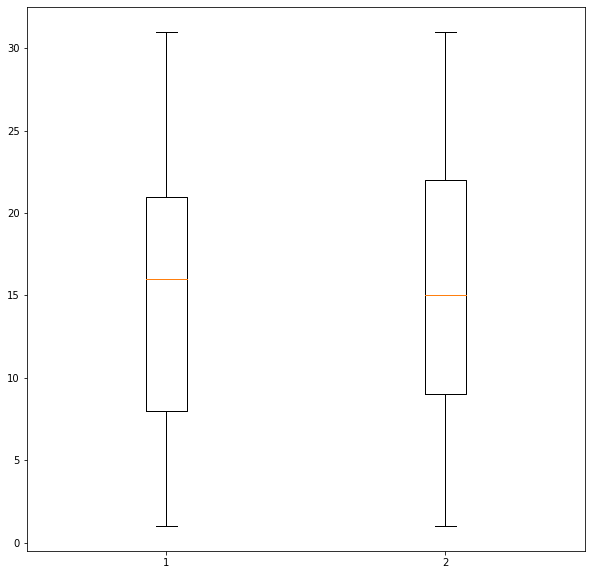

In [8]:
Class_0 = data.day[data.y == 'no']
Class_1 = data.day[data.y == 'yes']
data_to_plot = [Class_0, Class_1]
plt.boxplot(x = data_to_plot)
plt.show()

In [9]:
del data['day']

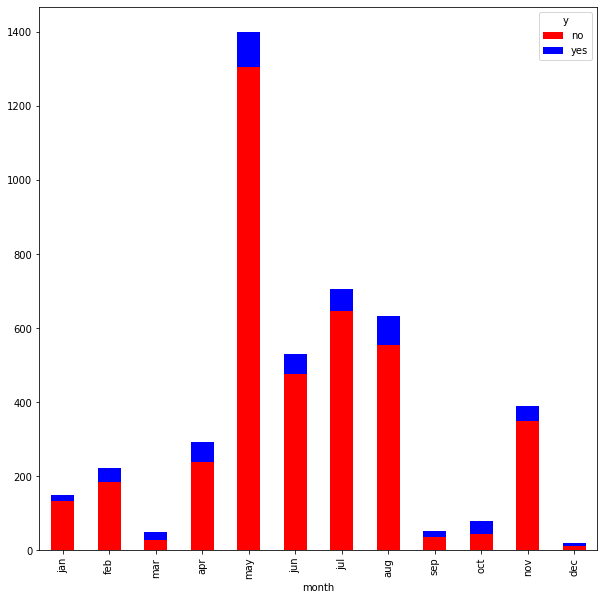

In [10]:
cross = pd.crosstab(data.month, data.y,)
cross = cross.reindex(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
cross.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [12]:
months = [['dec', 'jan', 'feb'], 
          ['mar', 'apr', 'may'], 
          ['jun', 'jul', 'aug'], 
          ['sep', 'oct', 'nov']]

seasons = ['winter', 'spring','summer', 'fall']

# Changing values of months for seasons 
for i, k in zip(months, seasons):
    data['month'].replace([i], k , inplace = True)

data.rename(columns = {'month':'season'}, inplace = True)


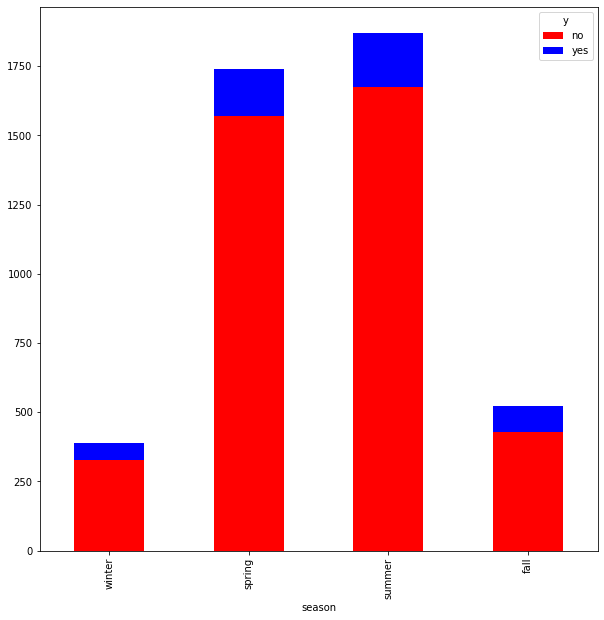

In [13]:
# Absolute values
cross = pd.crosstab(data.season, data.y)
cross = cross.reindex(['winter', 'spring', 'summer', 'fall'])
cross.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

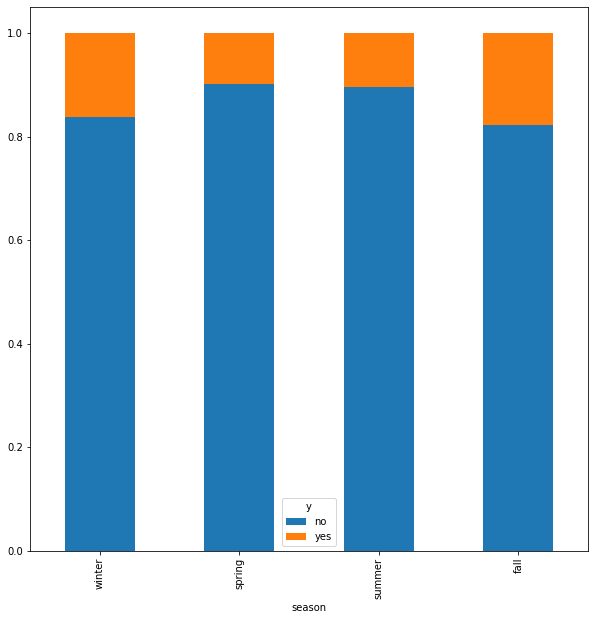

In [14]:
#Relative values
cross = pd.crosstab(data.season, data.y)
cross = cross.div(cross.sum(1).astype(float), axis=0)
cross = cross.reindex(['winter', 'spring', 'summer', 'fall'])
cross.plot(kind='bar', stacked=True,  grid=False)

In [15]:
print('The dataset has {0} rows and {1} columns'.format(data.shape[0], data.shape[1]))

The dataset has 4521 rows and 15 columns


In [16]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
season       object
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [17]:
data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
season       False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [18]:
for i in data.columns: 
    if data[i].dtype == "O":
        print(np.unique(data[i].values))

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
['divorced' 'married' 'single']
['primary' 'secondary' 'tertiary' 'unknown']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['cellular' 'telephone' 'unknown']
['fall' 'spring' 'summer' 'winter']
['failure' 'other' 'success' 'unknown']
['no' 'yes']


In [19]:
#Calculating the percentage of missing values
data.replace("unknown", np.nan, inplace = True)
percentage = (data.isnull().sum()/len(data))*100
percentage.sort_values(inplace=True)
percentage

age           0.000000
marital       0.000000
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
season        0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
y             0.000000
job           0.840522
education     4.136253
contact      29.285556
poutcome     81.950896
dtype: float64

In [20]:
pd.crosstab(data.poutcome, data.y)

y,no,yes
poutcome,,
failure,427,63
other,159,38
success,46,83


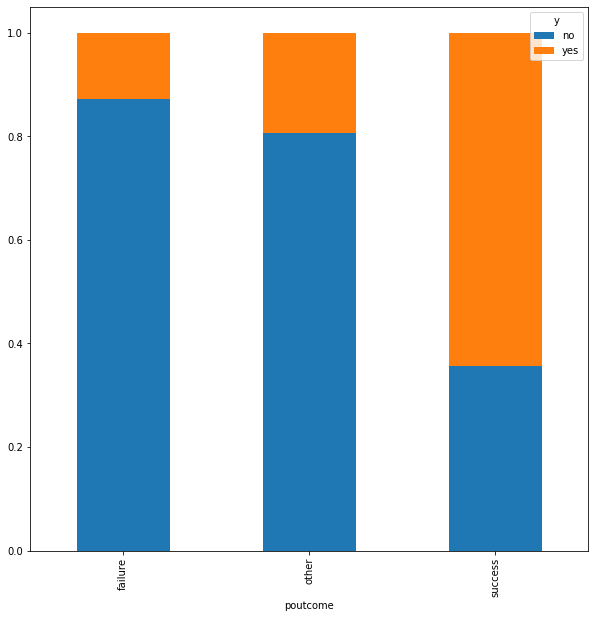

In [21]:
#Relative values
cross = pd.crosstab(data.poutcome, data.y)
cross = cross.div(cross.sum(1).astype(float), axis=0)
cross.plot(kind='bar', stacked=True,grid=False)

In [22]:
del data["poutcome"]

In [23]:
data.groupby('y').size() 

y
no     4000
yes     521
dtype: int64

Text(0.5, 1.0, 'Distribution of "default"')

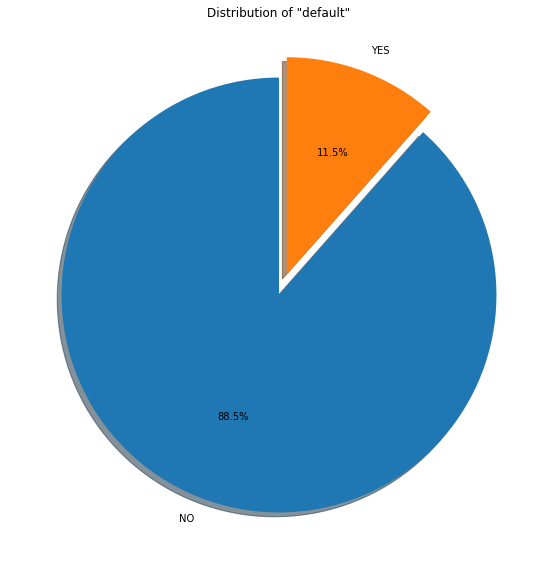

In [24]:
# Percentage of value "yes" in "default"
plt.pie([pd.value_counts(data.y)[0], pd.value_counts(data.y)[1]], 
        labels=["NO", "YES"], 
        startangle=90, 
        shadow=True, 
        explode=(0,0.1),
        autopct='%1.1f%%')
plt.title('Distribution of "default"')

In [25]:
data.describe()

,age,balance,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,2.793630,39.766645,0.542579
std,10.576211,3009.638142,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,50.000000,871.000000,25.000000


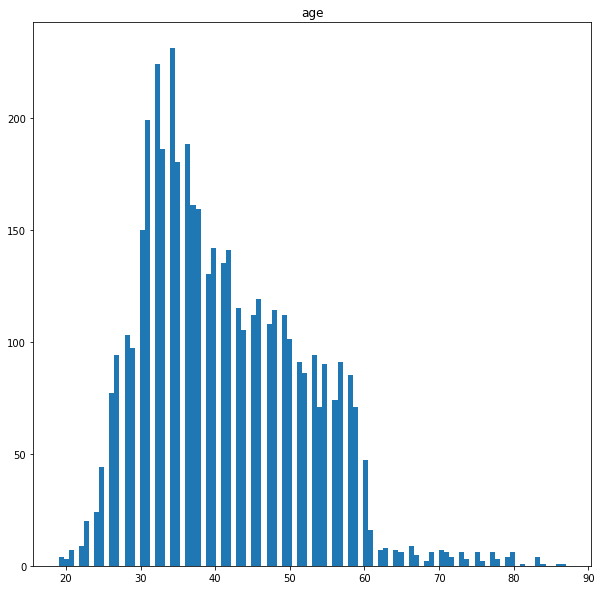

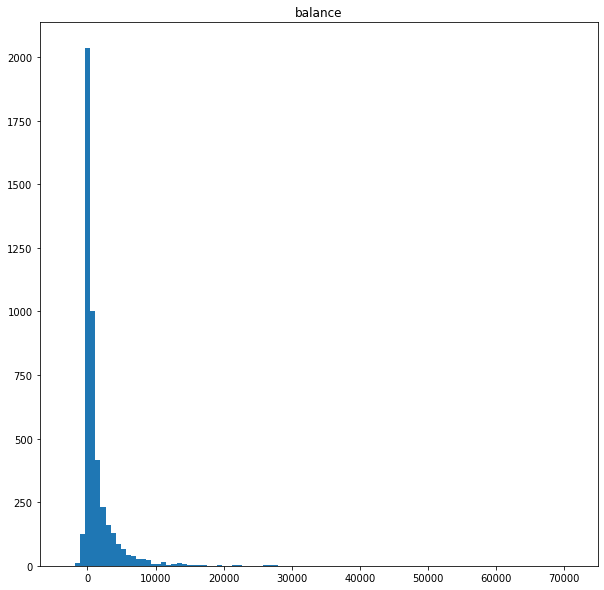

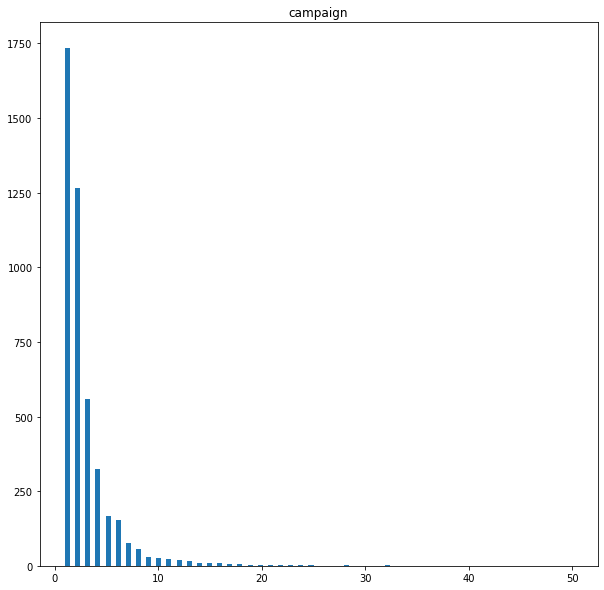

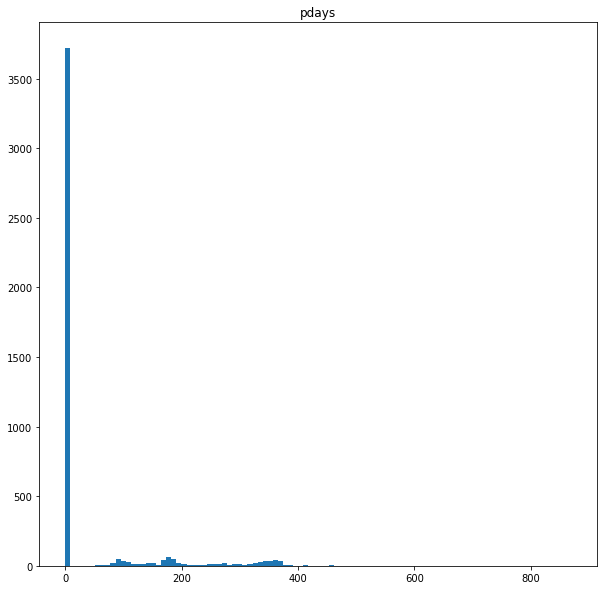

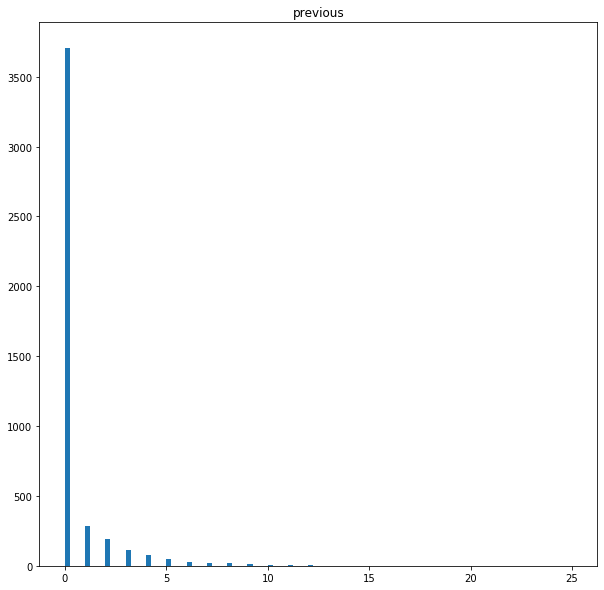

In [26]:
cont_feat = ["age", "balance", "campaign", "pdays", "previous"]
for i in cont_feat:
    plt.title(i)
    plt.hist(data[i], bins = 100)
    plt.show()

In [27]:
data.previous = data.previous.map(lambda x: 0 if x == 0 else 1)

In [29]:
cross = pd.crosstab(data.previous, data.pdays)
cross

pdays,-1,1,2,3,5,7,28,38,56,57,...,484,500,541,674,683,687,761,804,808,871
previous,,,,,,,,,,,,,,,,,,,,,
0,3705,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,7,1,1,3,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [30]:
cross = pd.crosstab(data.previous, data.pdays)
cross

pdays,-1,1,2,3,5,7,28,38,56,57,...,484,500,541,674,683,687,761,804,808,871
previous,,,,,,,,,,,,,,,,,,,,,
0,3705,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,7,1,1,3,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [31]:
data.rename(columns = {'previous':'ContactedBefore'}, inplace = True)
del data["pdays"]

In [32]:
# FILTERING 
data=data[abs(data['balance']-data['balance'].mean())<= 3*data['balance'].std()]

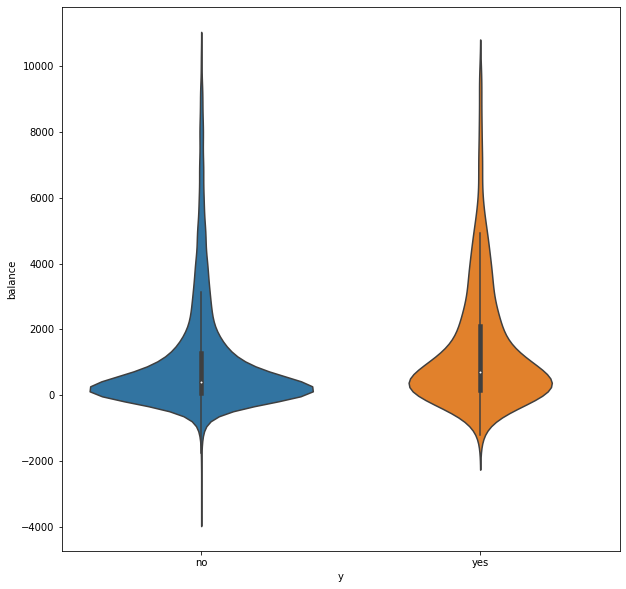

In [33]:
# Violinplot 
sns.violinplot(y=data["balance"], x=data["y"])

((array([-3.60454768, -3.36732307, -3.2364789 , ...,  3.2364789 ,
          3.36732307,  3.60454768]),
  array([-3313, -2082, -1746, ..., 10218, 10287, 10378], dtype=int64)),
 (1495.8435524186386, 1115.97563726596, 0.8460230322122897))

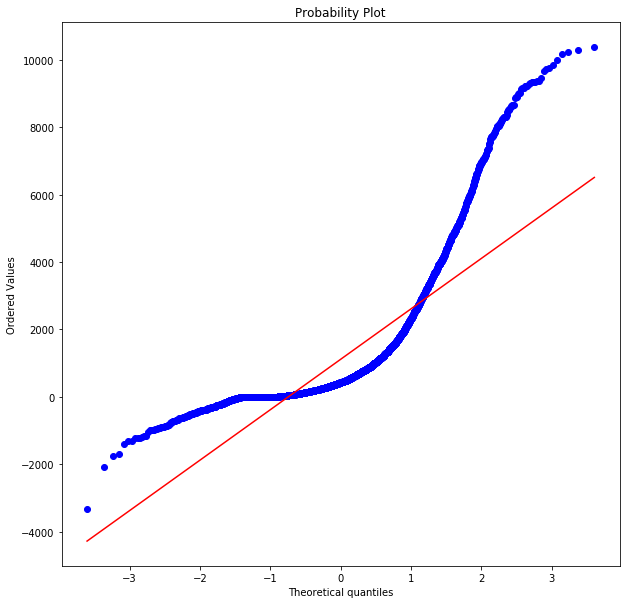

In [34]:
from scipy import stats
stats.probplot(data['balance'], plot=plt)

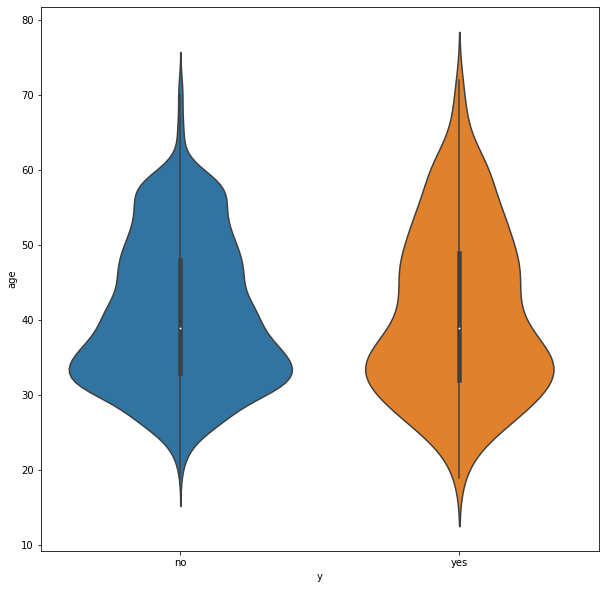

In [35]:
# FILTERING 
data=data[abs(data['age']-data['age'].mean())<= 3*data['age'].std()]

#Violinplot
sns.violinplot(y=data["age"], x=data["y"])

((array([-3.60201539, -3.36463453, -3.23369611, ...,  3.23369611,
          3.36463453,  3.60201539]),
  array([19, 19, 19, ..., 72, 72, 72], dtype=int64)),
 (9.798524466774154, 40.760364464692486, 0.9839307326171621))

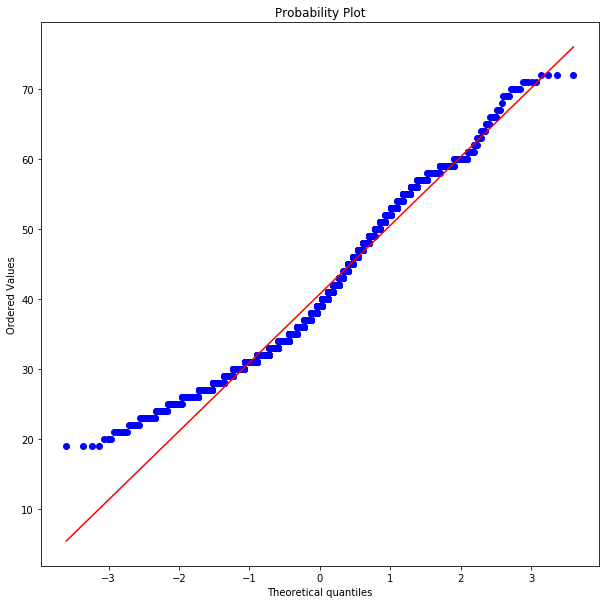

In [36]:
#Probability plot

stats.probplot(data['age'], plot=plt)

In [37]:
# Test for normality 
from scipy.stats import mstats
mstats.normaltest(data.age)

NormaltestResult(statistic=264.2330671893129, pvalue=4.192938492535665e-58)

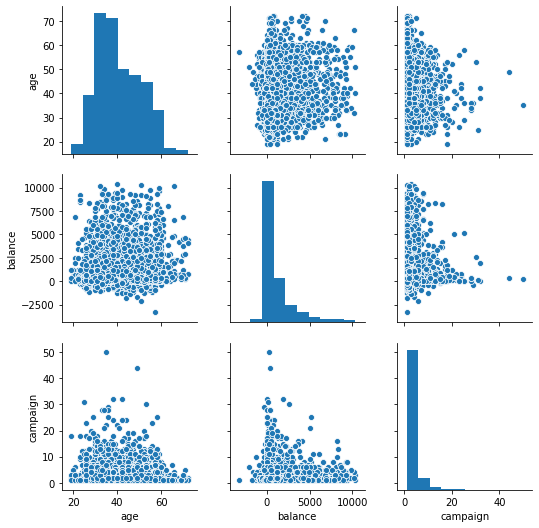

In [38]:
cont_feat = ["age", "balance", "campaign"]
sns.pairplot(data[cont_feat])

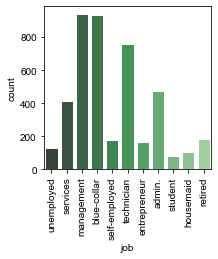

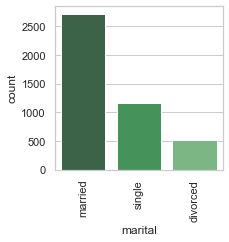

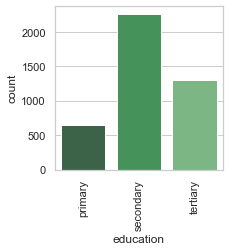

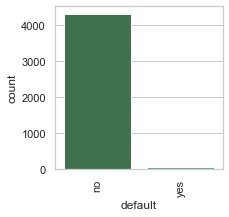

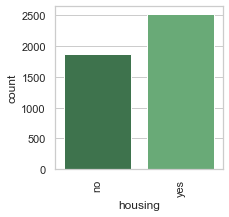

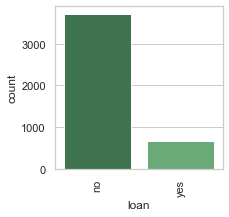

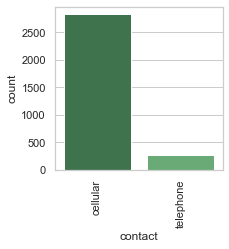

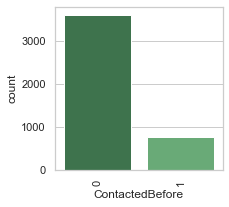

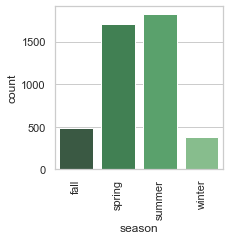

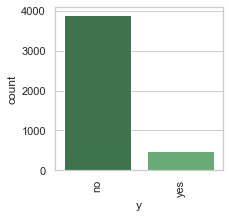

In [39]:
cat_feat = ["job", "marital", "education", "default", "housing", "loan", "contact", "ContactedBefore", "season", "y"]
# Histrograms for categorical features
for i in cat_feat:
    fig, ax = plt.subplots(figsize=(3, 3))
    sns.set(style="whitegrid", color_codes=True)
    sns.countplot(ax = ax, x=i, data=data, palette="Greens_d")
    plt.xticks(rotation=90)
    plt.show()

In [40]:
del data["default"]

In [41]:
data[["age", "balance", "campaign"]].corr(method='pearson')

,age,balance,campaign
age,1.000000,0.070142,-0.000441
balance,0.070142,1.000000,-0.009125
campaign,-0.000441,-0.009125,1.000000


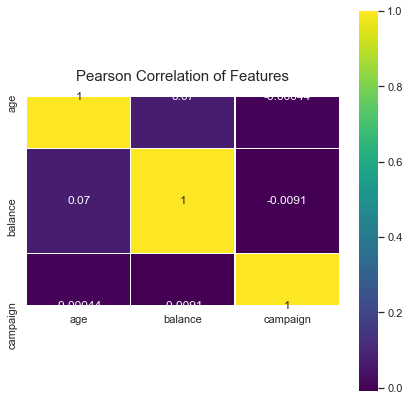

In [42]:
colormap = plt.cm.viridis
plt.figure(figsize=(7,7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data[["age", "balance", "campaign"]].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [44]:
for i in data.columns:
    data[i]=data[i].replace(np.nan, data[i].mode()[0])

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_feat = ["job", "marital", "education", "housing", "loan","season", "contact", "y"]

for i in cat_feat:
    data[i] = le.fit_transform(data[i])

In [46]:
data.head()

,age,job,marital,education,balance,housing,loan,contact,season,campaign,ContactedBefore,y
0,30,10,1,0,1787,0,0,0,0,1,0,0
1,33,7,1,1,4789,1,1,0,1,1,1,0
2,35,4,2,2,1350,1,0,0,1,1,1,0
3,30,4,1,2,1476,1,1,0,2,4,0,0
4,59,1,1,1,0,1,0,0,1,1,0,0


In [47]:
data = pd.get_dummies(data, columns = ["job", "marital", "education"])

In [48]:
data.head()

,age,balance,housing,loan,contact,season,campaign,ContactedBefore,y,job_0,...,job_7,job_8,job_9,job_10,marital_0,marital_1,marital_2,education_0,education_1,education_2
0,30,1787,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,33,4789,1,1,0,1,1,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,35,1350,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,30,1476,1,1,0,2,4,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,59,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [49]:
# X are predictors
# Y is the targer variable
X = data[data.columns.difference(['y'])]
Y = data.y

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size = 0.7, stratify = Y, random_state = 0)

In [51]:
from sklearn.preprocessing import StandardScaler
col_to_scale = ["age", "balance", "campaign"]
for i in col_to_scale:
    sc = StandardScaler().fit(X_train[i].values.reshape(-1, 1))
    X_train[i] = sc.transform(X_train[i].values.reshape(-1, 1))
    X_test[i] = sc.transform(X_test[i].values.reshape(-1, 1))

In [52]:
# Feature Extraction with RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 15)
fit = rfe.fit(X_train, Y_train)
selected_feature = fit.support_

print("Num Features: %d", fit.n_features_) 
print("Selected Features: %s",  fit.support_)
print("Feature Ranking: %s", fit.ranking_) 

Num Features: %d 15
Selected Features: %s [ True False False  True  True  True False False  True False  True  True
 False  True False  True False  True  True  True  True  True  True False
 False]
Feature Ranking: %s [ 1  8 11  1  1  1  2  4  1  3  1  1  5  1  9  1  6  1  1  1  1  1  1  7
 10]


In [53]:
# Dropping unimportant features
col_to_drop=[]
for i in range(len(X.columns)-1):
    if selected_feature[i] == False:
        col_to_drop.append(i)

X_train.drop(X.iloc[:, col_to_drop], axis=1, inplace = True)
X_test.drop(X.iloc[:, col_to_drop], axis=1, inplace = True)

In [54]:
# Remaining features
X_train.columns

Index(['ContactedBefore', 'campaign', 'contact', 'education_0', 'housing',
       'job_1', 'job_10', 'job_3', 'job_5', 'job_7', 'job_8', 'job_9', 'loan',
       'marital_0', 'marital_1', 'season'],
      dtype='object')

In [55]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [56]:
models = [
    SVC(kernel="rbf", class_weight = "balanced"), 
    KNeighborsClassifier(),
    DummyClassifier(strategy = 'most_frequent'), 
    LogisticRegression( class_weight="balanced"), 
]


In [57]:
scores = pd.DataFrame(columns= ['Model','Accuracy', 'F1-weighted', 'Precision', 'Recall'])
for model in models: 
    classifier=model.fit(X_train, Y_train)
    name = str(classifier).rsplit('(', 1)[0]
    accuracy = np.average(cross_val_score(classifier, X_test, Y_test, scoring= "accuracy"))
    f1 = np.average(cross_val_score(classifier, X_test, Y_test, scoring= "f1_weighted"))
    precision = np.average(cross_val_score(classifier, X_test, Y_test, scoring='precision_weighted'))
    recall = np.average(cross_val_score(classifier, X_test, Y_test, scoring='recall_weighted'))
    scores = scores.append({'Model': name,'Accuracy': accuracy,'F1-weighted': f1,
                             'Precision': precision, 'Recall': recall}, ignore_index=True)
    
scores.set_index("Model")  


,Accuracy,F1-weighted,Precision,Recall
Model,,,,
SVC,0.714640,0.757450,0.839342,0.714640
KNeighborsClassifier,0.876344,0.837478,0.818640,0.876344
DummyClassifier,0.887081,0.834000,0.786913,0.887081
LogisticRegression,0.653119,0.715315,0.841729,0.653119


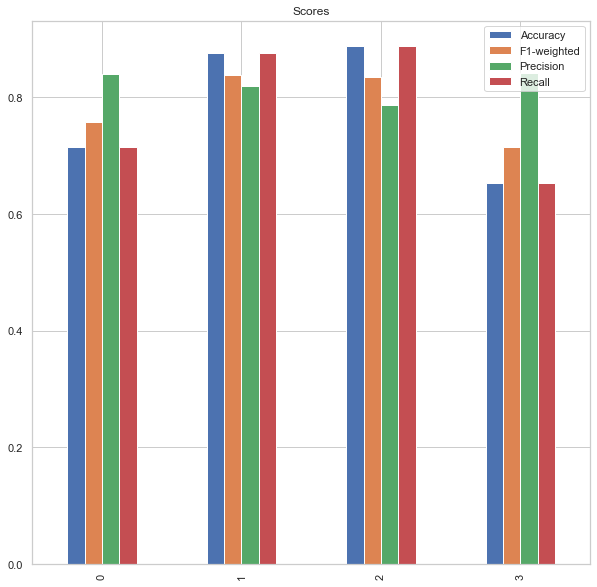

In [58]:
scores.plot(kind='bar', title='Scores' )

In [61]:
from sklearn.model_selection import learning_curve, GridSearchCV
                    
parameters = {'n_neighbors': np.arange(10)+1}

model = GridSearchCV(KNeighborsClassifier(),
                    parameters,
                    n_jobs               = 5,
                    cv                   = 5,
                    scoring              = 'f1_weighted'
                    ) 

model.fit(X_train, Y_train)
print("\nThe best estimator: ", model.best_estimator_)
print("\nThe best precision score: ", model.best_score_)
print("\nHighest scoring parameter set: ", model.best_params_)
model = model.best_estimator_


The best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

The best precision score:  0.8407045222035818

Highest scoring parameter set:  {'n_neighbors': 5}


In [62]:
accuracy = cross_val_score(model, X, Y, scoring='accuracy', cv=5) 
print( "Accuracy: "+ str(round(100*accuracy.mean(), 2)))
f1 = cross_val_score(model, X, Y, scoring='f1_weighted', cv=5) 

print("F1: " + str(round(100*f1.mean(), 2)))
precision = cross_val_score(model, X, Y, scoring='precision_weighted', cv=5) 
print("Precision: " + str(round(100*precision.mean(), 2)))
recall = cross_val_score(model, X, Y, scoring='recall_weighted', cv=5)
print("Recall: " + str(round(100*recall.mean(), 2)), "\n")

Accuracy: 87.79
F1: 83.4
Precision: 80.89
Recall: 87.79 



Text(0.5, 21.5, 'Predicted Classes')

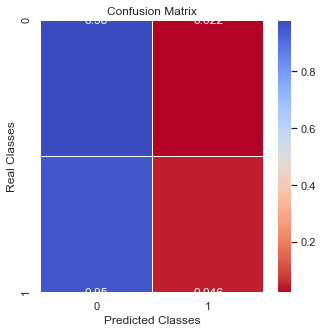

In [63]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
conf_m = confusion_matrix(Y_test,Y_pred)

Y_test_0 = Y_test.value_counts()[0]
Y_test_1 = Y_test.value_counts()[1]

conf_m_norm = np.array([[1.0 / Y_test_0, 1.0/Y_test_0],[1.0/Y_test_1, 1.0/Y_test_1]])
norm_conf_matrix = conf_m  * conf_m_norm


fig = plt.figure(figsize=(5,5))
sns.heatmap(norm_conf_matrix, cmap='coolwarm_r',linewidths=0.5,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')

In [64]:
# Confusion matrix
conf_m_norm

array([[0.00036684, 0.00036684],
       [0.00288184, 0.00288184]])